In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize
%matplotlib inline

In [2]:
max = np.array([39, 41, 43, 47, 49, 51, 45, 38, 37, 29, 27, 25])
min = np.array([21, 23, 27, 28, 32, 35, 31, 28, 21, 19, 17, 18])

Text(0,0.5,'Temperature ($^\\circ$C)')

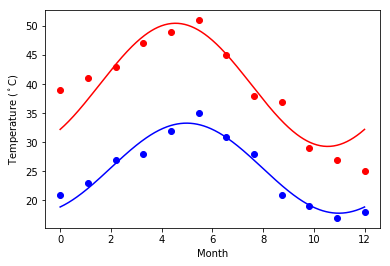

In [9]:
#Scipy problem: plot and fit max & min temperatures
def yearly_temps(times, avg, ampl, time_offset):
    return (avg + ampl * np.cos((times + time_offset) * 2 * np.pi / times.max()))
res_max, cov_max = optimize.curve_fit(yearly_temps, months,max, [20, 10, 0]) 
res_min, cov_min = optimize.curve_fit(yearly_temps, months,min, [-40, 20, 0])

days = np.linspace(0, 12, num=365)
months = np.linspace(0, 12, 12)
plt.plot(months, max, 'ro')
plt.plot(months, min, 'bo')
plt.plot(days, yearly_temps(days, *res_max), 'r-')
plt.plot(days, yearly_temps(days, *res_min), 'b-')
plt.xlabel('Month')
plt.ylabel('Temperature ($^\circ$C)')

In [49]:
#Matplolib visualization
import pandas as pd
url = 'https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_original.csv'
titanic = pd.read_csv(url)

In [50]:
titanic.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [51]:
#plot male/female proportion
labels = 'Male', 'Female'

colors = 'blue', 'yellow'
pd.value_counts(titanic['sex'].values, sort=False)

female    466
male      843
dtype: int64

([<matplotlib.patches.Wedge at 0x275ae2c7588>,
 [Text(-0.483365,0.988108,'Male'), Text(0.483365,-0.988108,'Female')])

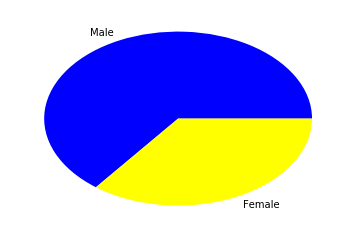

In [53]:
gender = [846,466]
plt.pie(gender,labels=labels,colors=colors)

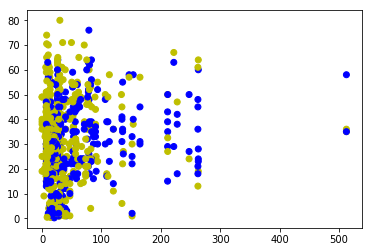

In [56]:
#scatterplot with the Fare paid and the Age, differ the plot color by gender
x=titanic.fare
y=titanic.age
colors = np.where(titanic["sex"]=='male','y','b')
plt.scatter(x, y, c=colors)